**Author : VEDANT PATIL**

**TASK : Prediction Using Decision Tree Alogrithm**

In [1]:
#Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading the data from the disk
Iris_data = pd.read_csv("D:\SPARKS FOUNDATION\Prediction Using Decision Tree Algorithm\Iris.csv")

**Feature Engineering**

In [3]:
Iris_data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


**Iris_data contain total 6 features in which 4 features (SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalwidthCm) are independent features and 1 feature(Species) is dependent or target variable. And Id column is like serial number for each data points.**

In [4]:
Iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
Iris_data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
Iris_data.Species.value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

**EXAMPLE**
                       YES                         YES
**AM I HUNGRY --> Can I spare Rs.250 --> Order Food From Restaurant
     |
     |
--------------> Go TO Sleep --> Cook And Eat**
                     NO              NO

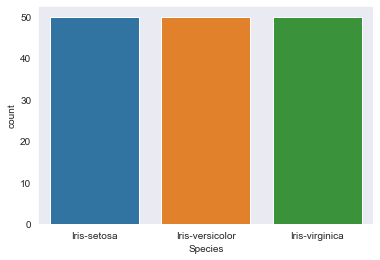

In [30]:
sns.countplot(x ='Species', data=Iris_data);

<AxesSubplot:xlabel='Species', ylabel='SepalLengthCm'>

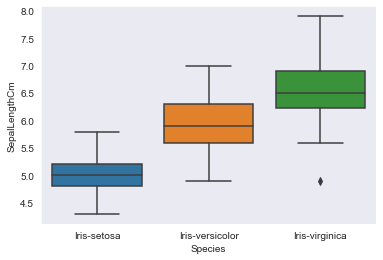

In [34]:
sns.boxplot(data=Iris_data, x='Species', y='SepalLengthCm')

<AxesSubplot:xlabel='PetalWidthCm', ylabel='Species'>

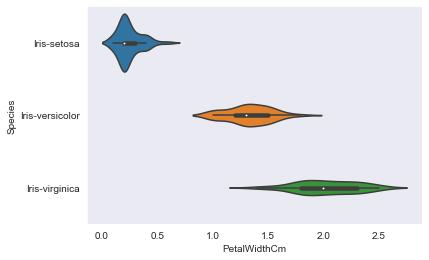

In [36]:
sns.violinplot(data=Iris_data, x='PetalWidthCm', y='Species')

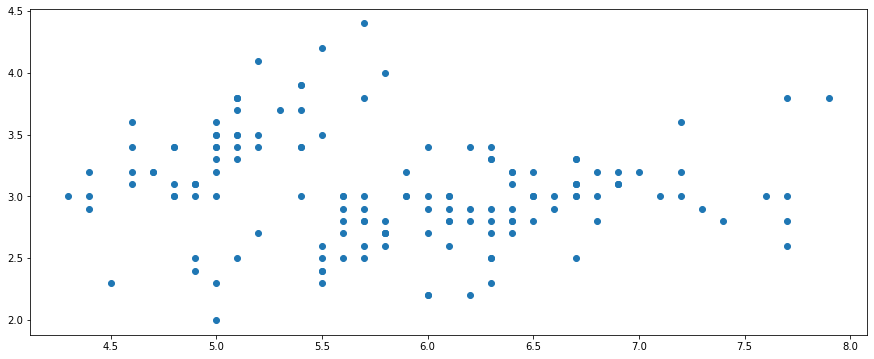

In [7]:
plt.figure(figsize=(15,6))
plt.scatter(Iris_data['SepalLengthCm'], Iris_data['SepalWidthCm'])
plt.show()

<Figure size 1080x432 with 0 Axes>

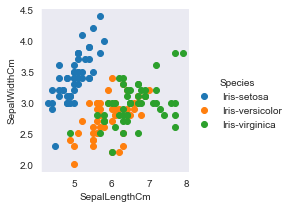

In [8]:
plt.figure(figsize=(15,6))
sns.set_style('dark')
sns.FacetGrid(Iris_data, hue = 'Species').map(plt.scatter, 'SepalLengthCm','SepalWidthCm').add_legend()

plt.show()

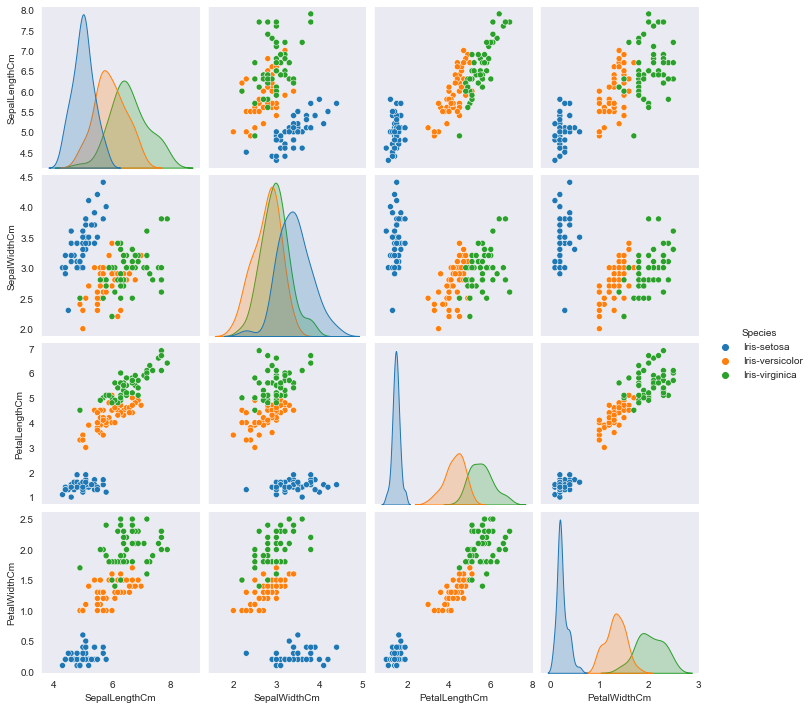

In [9]:
sns.pairplot(Iris_data.drop(['Id'],axis=1), hue='Species')
plt.show()

In [10]:
Iris_data['Sepal_diff'] = Iris_data['SepalLengthCm']-Iris_data['SepalWidthCm']
Iris_data['petal_diff'] = Iris_data['PetalLengthCm']-Iris_data['PetalWidthCm']

In [11]:
Iris_data['Sepal_petal_len_diff'] = Iris_data['SepalLengthCm']-Iris_data['PetalLengthCm']
Iris_data['Sepal_petal_width_diff'] = Iris_data['SepalWidthCm']-Iris_data['PetalWidthCm']

In [12]:
Iris_data['Sepal_petal_len_wid_diff'] = Iris_data['SepalLengthCm']-Iris_data['PetalWidthCm']
Iris_data['Sepal_petal_wid_len_diff'] = Iris_data['SepalWidthCm']-Iris_data['PetalLengthCm']
Iris_data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Sepal_diff,petal_diff,Sepal_petal_len_diff,Sepal_petal_width_diff,Sepal_petal_len_wid_diff,Sepal_petal_wid_len_diff
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1.6,1.2,3.7,3.3,4.9,2.1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,1.9,1.2,3.5,2.8,4.7,1.6
2,3,4.7,3.2,1.3,0.2,Iris-setosa,1.5,1.1,3.4,3.0,4.5,1.9
3,4,4.6,3.1,1.5,0.2,Iris-setosa,1.5,1.3,3.1,2.9,4.4,1.6
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1.4,1.2,3.6,3.4,4.8,2.2
...,...,...,...,...,...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,3.7,2.9,1.5,0.7,4.4,-2.2
146,147,6.3,2.5,5.0,1.9,Iris-virginica,3.8,3.1,1.3,0.6,4.4,-2.5
147,148,6.5,3.0,5.2,2.0,Iris-virginica,3.5,3.2,1.3,1.0,4.5,-2.2
148,149,6.2,3.4,5.4,2.3,Iris-virginica,2.8,3.1,0.8,1.1,3.9,-2.0


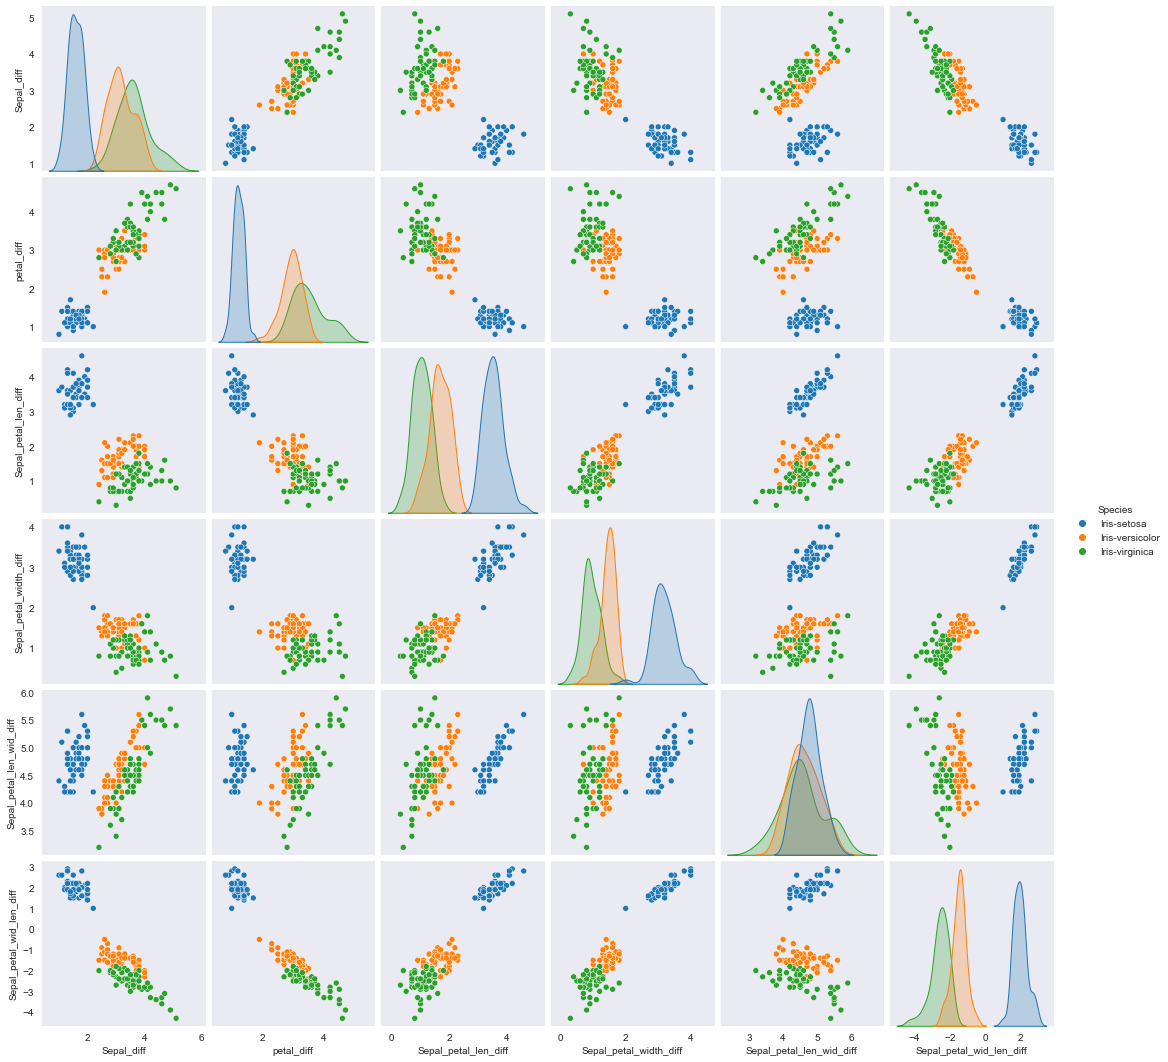

In [13]:
sns.pairplot(Iris_data[['Species','Sepal_diff','petal_diff','Sepal_petal_len_diff','Sepal_petal_width_diff','Sepal_petal_len_wid_diff','Sepal_petal_wid_len_diff']], hue='Species')
plt.show()

In [14]:
Iris_data.drop(['Id'],axis=1,inplace=True)

[Text(234.36, 199.32, 'X[5] <= 1.9\ngini = 0.665\nsamples = 94\nvalue = [30, 30, 34]'),
 Text(200.88000000000002, 163.07999999999998, 'X[4] <= -1.9\ngini = 0.498\nsamples = 64\nvalue = [0, 30, 34]'),
 Text(133.92000000000002, 126.83999999999999, 'X[3] <= 1.75\ngini = 0.153\nsamples = 36\nvalue = [0, 3, 33]'),
 Text(100.44000000000001, 90.6, 'X[2] <= 5.05\ngini = 0.49\nsamples = 7\nvalue = [0, 3, 4]'),
 Text(66.96000000000001, 54.359999999999985, 'X[0] <= 5.6\ngini = 0.375\nsamples = 4\nvalue = [0, 3, 1]'),
 Text(33.480000000000004, 18.119999999999976, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(100.44000000000001, 18.119999999999976, 'gini = 0.0\nsamples = 3\nvalue = [0, 3, 0]'),
 Text(133.92000000000002, 54.359999999999985, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(167.40000000000003, 90.6, 'gini = 0.0\nsamples = 29\nvalue = [0, 0, 29]'),
 Text(267.84000000000003, 126.83999999999999, 'X[3] <= 1.65\ngini = 0.069\nsamples = 28\nvalue = [0, 27, 1]'),
 Text(234.36, 90.

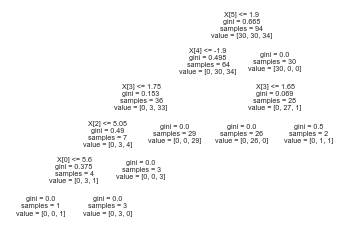

In [37]:
from sklearn import tree
import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score

X = Iris_data[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Sepal_petal_wid_len_diff','Sepal_petal_width_diff']]
y = Iris_data['Species']

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.30, random_state=42)

Xt, Xcv, Yt, Ycv = train_test_split(Xtrain, Ytrain, test_size=0.10, random_state=42)

Iris_clf = DecisionTreeClassifier(criterion='gini', min_samples_split=4)
Iris_clf.fit(Xt, Yt)

tree.plot_tree(Iris_clf)

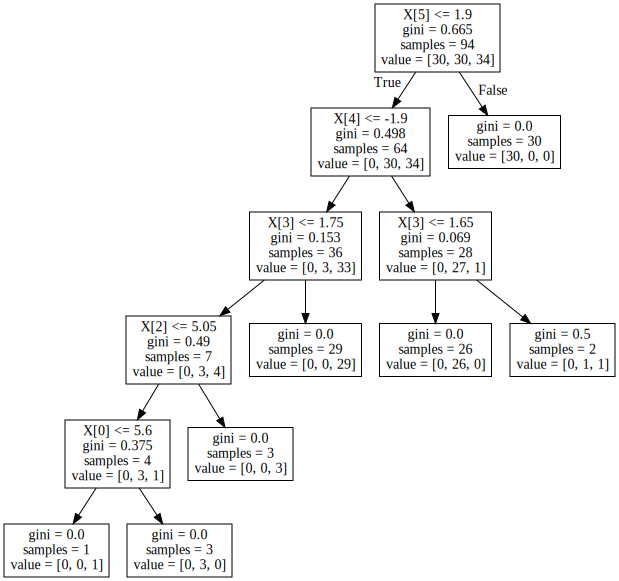

In [38]:
dot_data = tree.export_graphviz(Iris_clf, out_file=None)

graph = graphviz.Source(dot_data)
graph

In [39]:
print('Accuracy score is:',cross_val_score(Iris_clf,Xt,Yt,cv=3,scoring='accuracy').mean())

Accuracy score is: 0.914986559139785


In [40]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

Y_hat = Iris_clf.predict(Xcv)

print('Accuracy score for validation test data is:', accuracy_score(Ycv, Y_hat))
multilabel_confusion_matrix(Ycv, Y_hat)

Accuracy score for validation test data is: 0.8181818181818182


array([[[10,  0],
        [ 0,  1]],

       [[ 3,  1],
        [ 1,  6]],

       [[ 7,  1],
        [ 1,  2]]], dtype=int64)

In [41]:
YT_hat = Iris_clf.predict(Xtest)
YT_hat

print('Model Accuracy on Totally Unseen data(Xtest) is:', accuracy_score(Ytest, YT_hat)*100,'%')
multilabel_confusion_matrix(Ytest, YT_hat)

Model Accuracy on Totally Unseen data(Xtest) is: 100.0 %


array([[[26,  0],
        [ 0, 19]],

       [[32,  0],
        [ 0, 13]],

       [[32,  0],
        [ 0, 13]]], dtype=int64)

[Text(133.92000000000002, 203.85, 'X[2] <= 2.45\ngini = 0.664\nsamples = 105\nvalue = [31, 37, 37]'),
 Text(100.44000000000001, 176.67000000000002, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(167.40000000000003, 176.67000000000002, 'X[4] <= -1.9\ngini = 0.5\nsamples = 74\nvalue = [0, 37, 37]'),
 Text(100.44000000000001, 149.49, 'X[3] <= 1.75\ngini = 0.18\nsamples = 40\nvalue = [0, 4, 36]'),
 Text(66.96000000000001, 122.31, 'X[4] <= -2.6\ngini = 0.494\nsamples = 9\nvalue = [0, 4, 5]'),
 Text(33.480000000000004, 95.13, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(100.44000000000001, 95.13, 'X[0] <= 5.45\ngini = 0.444\nsamples = 6\nvalue = [0, 4, 2]'),
 Text(66.96000000000001, 67.94999999999999, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(133.92000000000002, 67.94999999999999, 'X[1] <= 2.75\ngini = 0.32\nsamples = 5\nvalue = [0, 4, 1]'),
 Text(100.44000000000001, 40.77000000000001, 'gini = 0.0\nsamples = 3\nvalue = [0, 3, 0]'),
 Text(167.40000000000003, 40.7700

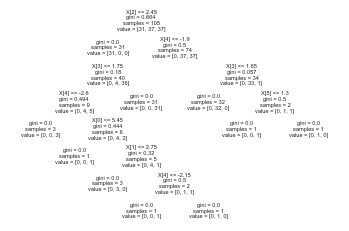

In [50]:
Iris_Fclf = DecisionTreeClassifier(criterion = 'gini', min_samples_split=2)
Iris_Fclf.fit(Xtrain,Ytrain)

tree.plot_tree(Iris_Fclf)

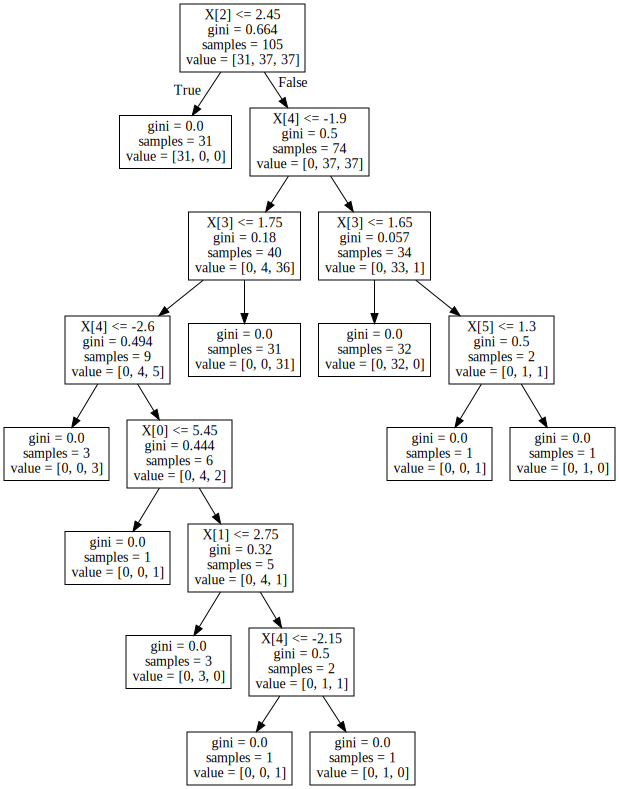

In [51]:
dot_data = tree.export_graphviz(Iris_Fclf, out_file=None)
graph = graphviz.Source(dot_data)
graph

In [52]:
YT_Fhat = Iris_Fclf.predict(Xtest)
YT_Fhat

print('Model Accuracy Score on Totally Unseen Data(Xtest) is:', accuracy_score(Ytest, YT_Fhat)*100,'%')
multilabel_confusion_matrix(Ytest, YT_Fhat)

Model Accuracy Score on Totally Unseen Data(Xtest) is: 100.0 %


array([[[26,  0],
        [ 0, 19]],

       [[32,  0],
        [ 0, 13]],

       [[32,  0],
        [ 0, 13]]], dtype=int64)

In [53]:
Test_point = [[5.4,3.0,4.5,1.5,-1.5,1.5],
             [6.5,2.8,4.6,1.5,-1.8,1.3],
             [5.1,2.5,3.0,1.1,-0.5,1.4],
             [5.1,3.3,1.7,0.5,1.6,2.8],
             [6.0,2.7,5.1,1.6,-2.4,1.1],
             [6.0,2.2,5.0,1.5,-2.8,0.7]]

print(Iris_clf.predict(Test_point))

['Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor']
